**1. INTRODUCCIÓN**



El siguiente dataset consiste en datos recopilados de los meses febrero, marzo, abril y junio de los incidentes de seguridad ciudadana en Chiclayo.
Las variables en los datasets son las siguientes:


1. **FECHA_CORTE:** Es la fecha del último día del mes hasta que se reportó incidentes
2. **ANIO:** Es el año de la fecha de corte
3. **MES:** Es el mes de la fecha de corte
4. **TURNO:** Es el horario en el que se registró el incidente( MAÑANA, TARDE Y NOCHE)
5. **SEMANA:** Indica en que semana del mes ocurrió el incidente (1, 2, 3 y 4)
6. **INCIDENCIAS:** Es el nombre del incidente
7. **DOMINGO, LUNES.... SABADO:** Son la cantidad de incidentes ocurridos en cada uno de esos días.
8. **TOTAL:** Es la suma de todos los incidentes ocurridos al rededor de la semana.

El objetivo de este análisis es para que las autoridades de Chiclayo puedan tomar mejores desciones para con los incidentes, ya que al tener un análisis detallado estos puedan proponer estrategias de mejora.

**2. MANIPULACIÓN Y LIMPIEZA DE DATOS**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,9)

In [ ]:
# Carga de los datos
df_Feb = pd.read_excel('/content/2023_Febrero_Incidencias_SegCiudadana.xlsx')
df_Mar = pd.read_excel('/content/2023_Marzo_Incidencias_SegCiudadana.xlsx')
df_Abr = pd.read_excel('/content/2023_Abril_Incidencias_SegCiudadana.xlsx')
df_May = pd.read_excel('/content/2023_Mayo_Incidencias_SegCiudadana.xlsx')
df_Jun = pd.read_excel('/content/2023_Junio_Incidencias_SegCiudadana.xlsx')


In [ ]:
# Uniendo todos los dataframes en uno solo
df = pd.concat([df_Feb, df_Mar, df_Abr, df_May, df_Jun])

In [ ]:
# Visualizando el datased general
df.head(10)

,FECHA_CORTE,ANIO,MES,TURNO,SEMANA,INCIDENCIAS,DOMINGO,LUNES,MARTES,MIERCOLES,JUEVES,VIERNES,SABADO,TOTAL
0,2023-02-28,2023,2,NOCHE,1,Comercio ambulatorio,0,0,0,10,10,11,4,35
1,2023-02-28,2023,2,NOCHE,1,Paradero Informal,0,0,0,11,10,11,6,38
2,2023-02-28,2023,2,NOCHE,1,Alteracion Orden Público,0,0,0,3,3,2,1,9
3,2023-02-28,2023,2,NOCHE,1,Zona Rígida,0,0,0,18,17,18,8,61
4,2023-02-28,2023,2,NOCHE,1,Pérdida de Personas,0,0,0,0,0,0,0,0
5,2023-02-28,2023,2,NOCHE,1,Meretricio,0,0,0,4,3,4,3,14
6,2023-02-28,2023,2,NOCHE,1,Consumo Bebidas Alcohólicas - drogas,0,0,0,14,15,14,6,49
7,2023-02-28,2023,2,NOCHE,1,Indigentes,0,0,0,3,3,2,1,9
8,2023-02-28,2023,2,NOCHE,1,Movilización,0,0,0,0,0,0,0,0
9,2023-02-28,2023,2,NOCHE,1,Alerta de Robo,0,0,0,0,0,0,0,0


In [ ]:
# Descripcion de columnas
df.columns

Index(['FECHA_CORTE', 'ANIO', 'MES', 'TURNO', 'SEMANA', 'INCIDENCIAS',
       'DOMINGO', 'LUNES', 'MARTES', 'MIERCOLES', 'JUEVES', 'VIERNES',
       'SABADO', 'TOTAL'],
      dtype='object')

In [ ]:
# Numero de filas y columnas
df.shape

(700, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 0 to 149
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA_CORTE  700 non-null    datetime64[ns]
 1   ANIO         700 non-null    int64         
 2   MES          700 non-null    int64         
 3   TURNO        700 non-null    object        
 4   SEMANA       700 non-null    int64         
 5   INCIDENCIAS  700 non-null    object        
 6   DOMINGO      700 non-null    int64         
 7   LUNES        700 non-null    int64         
 8   MARTES       700 non-null    int64         
 9   MIERCOLES    700 non-null    int64         
 10  JUEVES       700 non-null    int64         
 11  VIERNES      700 non-null    int64         
 12  SABADO       700 non-null    int64         
 13  TOTAL        700 non-null    int64         
dtypes: datetime64[ns](1), int64(11), object(2)
memory usage: 82.0+ KB


**Se observa que no hay valores nulos**


In [ ]:
# Algunas estadisticas del las columnas de los días
df_dias = df[['DOMINGO', 'LUNES', 'MARTES', 'MIERCOLES', 'JUEVES', 'VIERNES', 'SABADO']]
df_dias.describe()

,DOMINGO,LUNES,MARTES,MIERCOLES,JUEVES,VIERNES,SABADO
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,2.420000,2.975714,3.198571,3.372857,3.334286,3.398571,3.031429
std,4.992486,6.665156,6.663526,7.057062,6.885719,7.363813,6.919660
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000
max,35.000000,52.000000,45.000000,57.000000,52.000000,55.000000,45.000000


**3. ANÁLISIS DE DATOS**

In [ ]:
# Veamos las incidencias por turno
Analisis1 = df.groupby(['MES', 'TURNO'])['TOTAL'].agg(['sum', 'mean', 'min', 'max'])
Analisis1

sum    mean  min  max
MES TURNO                         
2   MAÑANA   933  23.325    0  216
    NOCHE   1170  23.400    0   81
    TARDE    688  13.760    0  151
3   MAÑANA   491  12.275    0  153
    NOCHE   1077  21.540    0   85
    TARDE    889  17.780    0  145
4   MAÑANA   855  21.375    0  152
    NOCHE    618  15.450    0   68
    TARDE    700  17.500    0  163
5   MAÑANA  1241  24.820    0  200
    NOCHE   1207  24.140    0  101
    TARDE   1303  26.060    0  252
6   MAÑANA  1375  27.500    0  283
    NOCHE   1343  26.860    0  134
    TARDE   1322  26.440    0  243

Se observa que del mes febrero a marzo las incidencias del turno mañana disminuyeron, pero del mes de abril hasta junio fueron en aumento



In [ ]:
#Se analizara que tipos de incidentes ocurren mas en cada turno
Analisis2 = df.groupby(['TURNO', 'INCIDENCIAS'])['TOTAL'].agg(['sum'])
Analisis2

sum
TURNO  INCIDENCIAS                               
MAÑANA Alerta de Robo                          60
       Alteracion Orden Público                68
       Comercio ambulatorio                  3315
       Consumo Bebidas Alcohólicas - drogas   105
       Indigentes                              81
       Meretricio                             314
       Movilización                            21
       Paradero Informal                      597
       Pérdida de Personas                     10
       Zona Rígida                            324
NOCHE  Alerta de Robo                           0
       Alteracion Orden Público                47
       Comercio ambulatorio                  1289
       Consumo Bebidas Alcohólicas - drogas   925
       Indigentes                             324
       Meretricio                             270
       Movilización                             0
       Paradero Informal                      875
       Pérdida de Personas                      3
       Zona Rígida                           1682
TARDE  Alerta de Robo                          24
       Alteracion Orden Público                34
       Comercio ambulatorio                  3588
       Consumo Bebidas Alcohólicas - drogas   111
       Indigentes                              96
       Meretricio                             275
       Movilización                             9
       Paradero Informal                      579
       Pérdida de Personas                     19
       Zona Rígida                            167

1. Se observa que el comercio ambulatorio es la incidencia que tiene más frecuencia en los 3 turno
2. Se observa que las alertas de robo es más frecuente en la mañana que en la tarde y de noche no hay alertas de robo, esto podría deberse a que las personas están descansando.
3. Se observa que de tarde se da mayor incidencia de pérdida de personas que en el día y en la noche
4. De noche las personas sulene consumir más bebidas alcoholicas
5. Las indicencias de zona rígida son más frecuentes en la noche que en la mañana y en la tarde

**5. VISUALIZACIÓN DE RESULTADOS**


<BarContainer object of 5 artists>

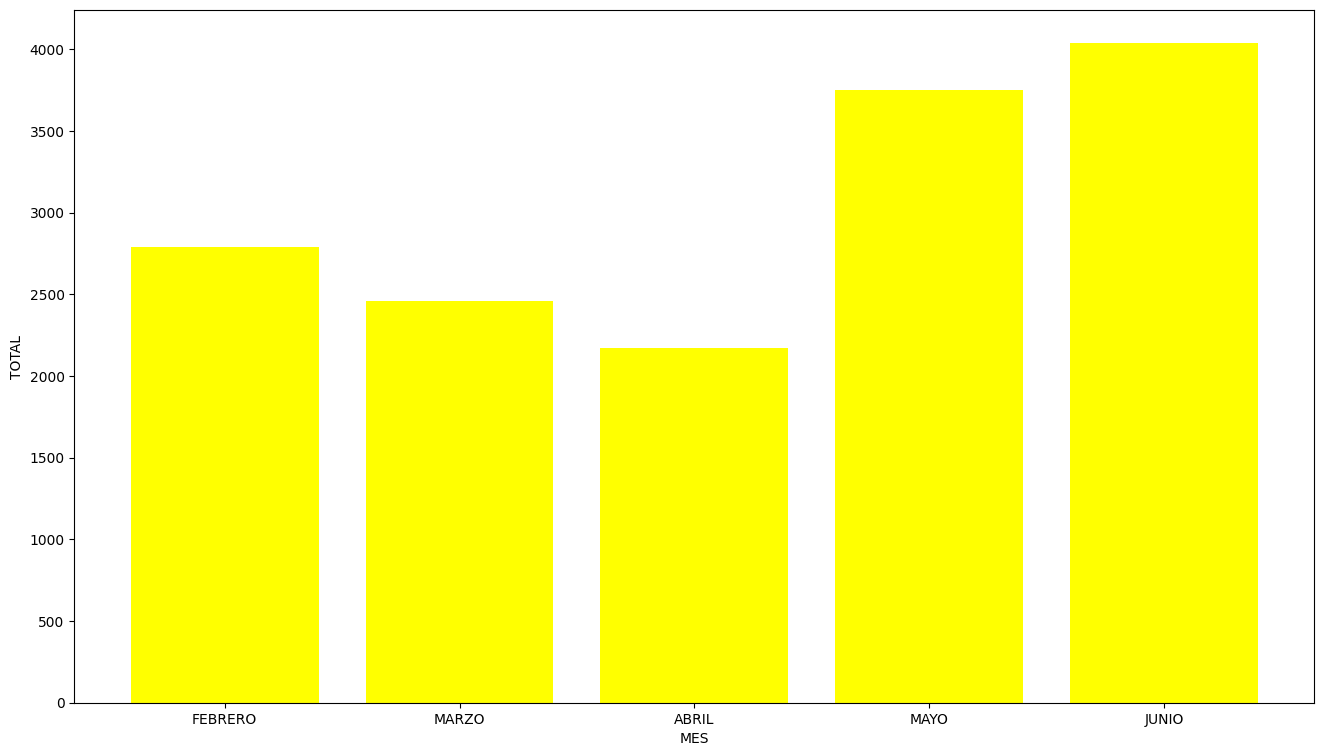

In [ ]:
MES = [2, 3, 4, 5, 6]
NOMBRE_MESES = ['FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO']
TOTAL_MESES = [df[df['MES']==mes]['TOTAL'].sum() for mes in MES] # Total para cada mes
# HISTOGRAMA
plt.xlabel('MES')
plt.ylabel('TOTAL')
plt.bar(NOMBRE_MESES, TOTAL_MESES, color = 'yellow')

1. Se puede observar que el mes de junio fue en el que más incidencias hubo, en segundo lugar se tiene a mayo


<BarContainer object of 7 artists>

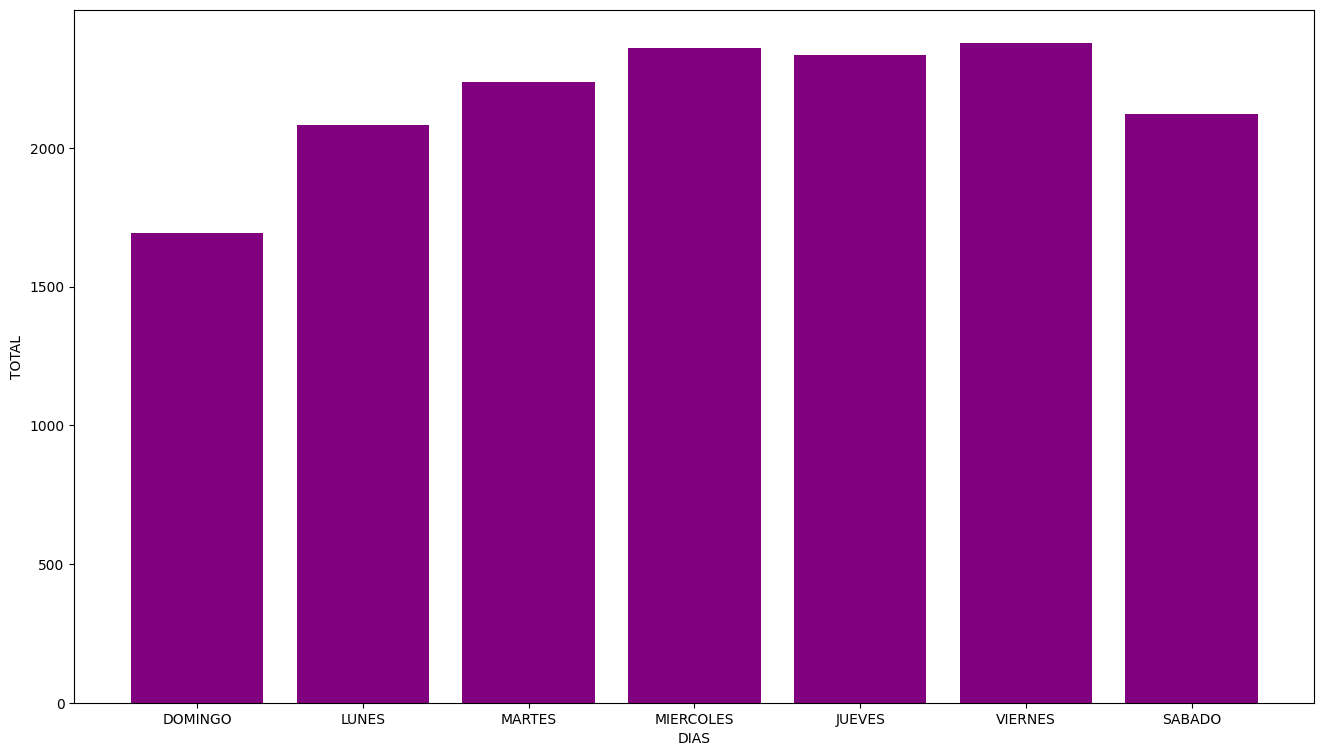

In [ ]:
DIAS = ['DOMINGO', 'LUNES', 'MARTES', 'MIERCOLES', 'JUEVES', 'VIERNES', 'SABADO']
TOTAL_DIAS = df.loc[:,'DOMINGO':'SABADO'].sum()
# HISTOGRAMA DE DÍAS
plt.xlabel('DIAS')
plt.ylabel('TOTAL')
plt.bar(DIAS, TOTAL_DIAS, color = 'purple')

Se observa que el día en el cual hay menos incidencias es el día domingo y en el que hay más indicencias es el día viernes


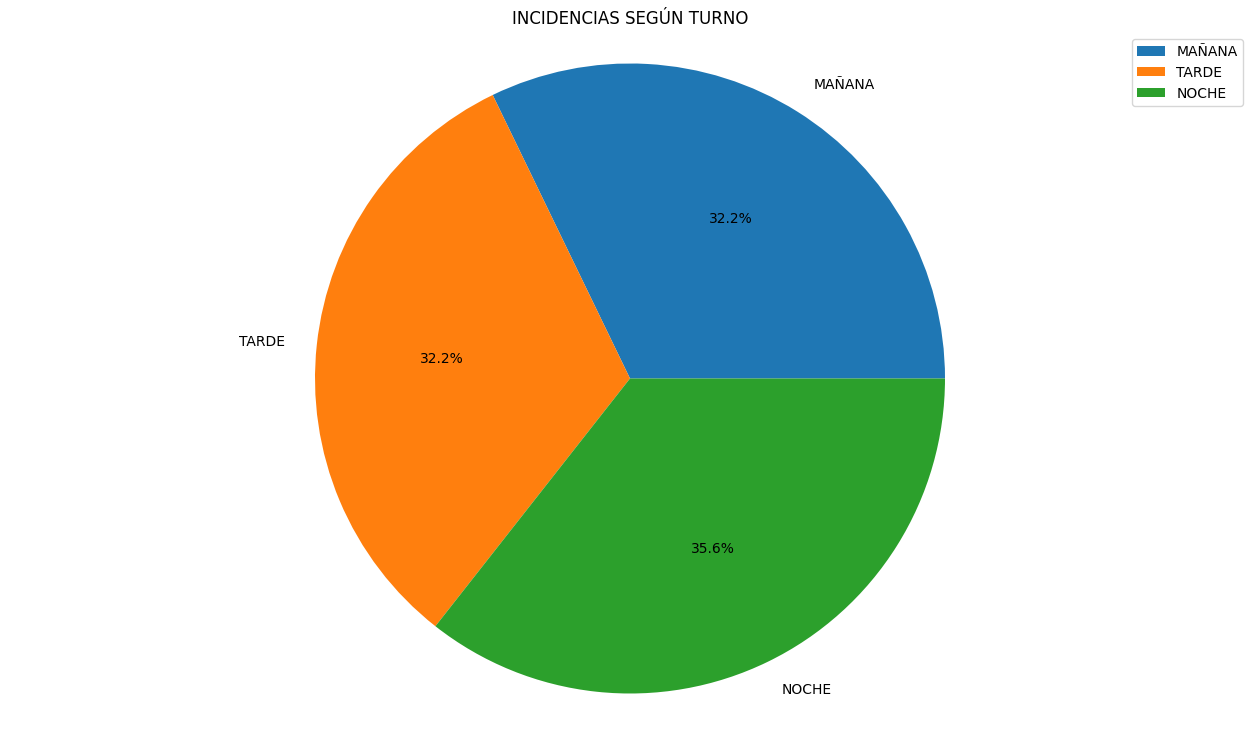

In [ ]:
TURNO = ['MAÑANA', 'TARDE', 'NOCHE']
TOTAL_TURNOS = [df[df['TURNO']==turno]['TOTAL'].sum() for turno in TURNO]
fig1, ax1 = plt.subplots()
ax1.pie(TOTAL_TURNOS, labels=TURNO, autopct='%1.1f%%')
ax1.axis('equal')

plt.title('INCIDENCIAS SEGÚN TURNO')
plt.legend()


Se observa del gráfico de pastel que las incidencias son mayormente de noche y de igual proporcion en la mañana y en la noche

**5. CONCLUSIONES**

1. **Comercio Ambulatorio:**
El comercio ambulatorio es la incidencia más frecuente en los tres turnos. Esto podría requerir una atención especial por parte de las autoridades para regular y controlar esta actividad.
2. **Alertas de Robo:**
Las alertas de robo son más frecuentes en la mañana que en la tarde o la noche. La ausencia de alertas de robo durante la noche podría estar relacionada con el descanso de las personas.
3. **Pérdida de Personas:**
Las incidencias de pérdida de personas son más comunes en la tarde que durante el día o la noche. Esto podría indicar la necesidad de medidas preventivas o de búsqueda y rescate en horarios específicos.
4. **Consumo de Bebidas Alcohólicas:**
El consumo de bebidas alcohólicas es más frecuente durante la noche. Esto podría requerir una mayor vigilancia en áreas propensas a este tipo de comportamiento.
4. **Zona Rígida:**
Las incidencias relacionadas con zona rígida son más comunes en la noche que en la mañana o la tarde. Esto podría estar relacionado con la aplicación de regulaciones o restricciones específicas en ciertas áreas.
5. **Meses con Mayor Incidencia:**
Junio tuvo la mayor cantidad de incidencias, seguido de mayo. Esto podría ser útil para planificar estrategias específicas durante estos meses.
6. **Días de la Semana:**
El domingo tiene la menor cantidad de incidencias, mientras que el viernes es el día con más incidentes. Esto podría influir en la asignación de recursos y patrullaje.
7. **Distribución Horaria:**
Las incidencias son mayormente de noche, con una proporción similar entre la mañana y la tarde. Esto podría guiar la programación de patrullas y operativos.


